In [1]:
#Importing train data

In [2]:
import numpy as np
import pandas as pd


train = pd.read_csv('./data/train.csv')
print(train.shape)
train.head()

(26296946, 20)


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [3]:
#importing targets and spilt session id and question number

In [4]:
labels = pd.read_csv('./data/train_labels.csv')
print(labels.shape)

labels['level'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )
labels['session_id'] = labels.session_id.apply(lambda x: int(x.split('_')[0]) )

labels.head()

(424116, 2)


,session_id,correct,level
0,20090312431273200,1,1
1,20090312433251036,0,1
2,20090312455206810,1,1
3,20090313091715820,0,1
4,20090313571836404,1,1


In [5]:
#import test data

In [6]:
test = pd.read_csv('./data/test.csv')
test.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0


In [7]:
#displaying histogram of all values pre trimming

In [8]:
cols = ['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level', 'page', 
            'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration', 
            'text', 'fqid', 'room_fqid', 'text_fqid', 'fullscreen', 'hq', 'music', 'level_group']

categorical_features = ['event_name', 'name','text', 'fqid', 'room_fqid', 'text_fqid','level_group']
numeric_features = [col for col in train.columns if col not in categorical_features]

In [9]:
level_1 = train[train['level_group'] == '0-4']
level_2 = train[train['level_group'] == '5-12']
level_3 = train[train['level_group'] == '13-22']

In [10]:
slevel_1 = level_1.sample(n=3000)
print(slevel_1.shape)
slevel_2 = level_2.sample(n=3000)
print(slevel_2.shape)
slevel_3 = level_3.sample(n=3000)
print(slevel_3.shape)

(3000, 20)
(3000, 20)
(3000, 20)


In [11]:
strain= slevel_1.append(slevel_2)
strain = strain.append(slevel_3)

C:\Users\mckee\AppData\Local\Temp\ipykernel_21084\1326163993.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  strain= slevel_1.append(slevel_2)
C:\Users\mckee\AppData\Local\Temp\ipykernel_21084\1326163993.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  strain = strain.append(slevel_3)


In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for feature in categorical_features:
    strain[feature] = label_encoder.fit_transform(strain[feature])
    test[feature]=label_encoder.fit_transform(test[feature])

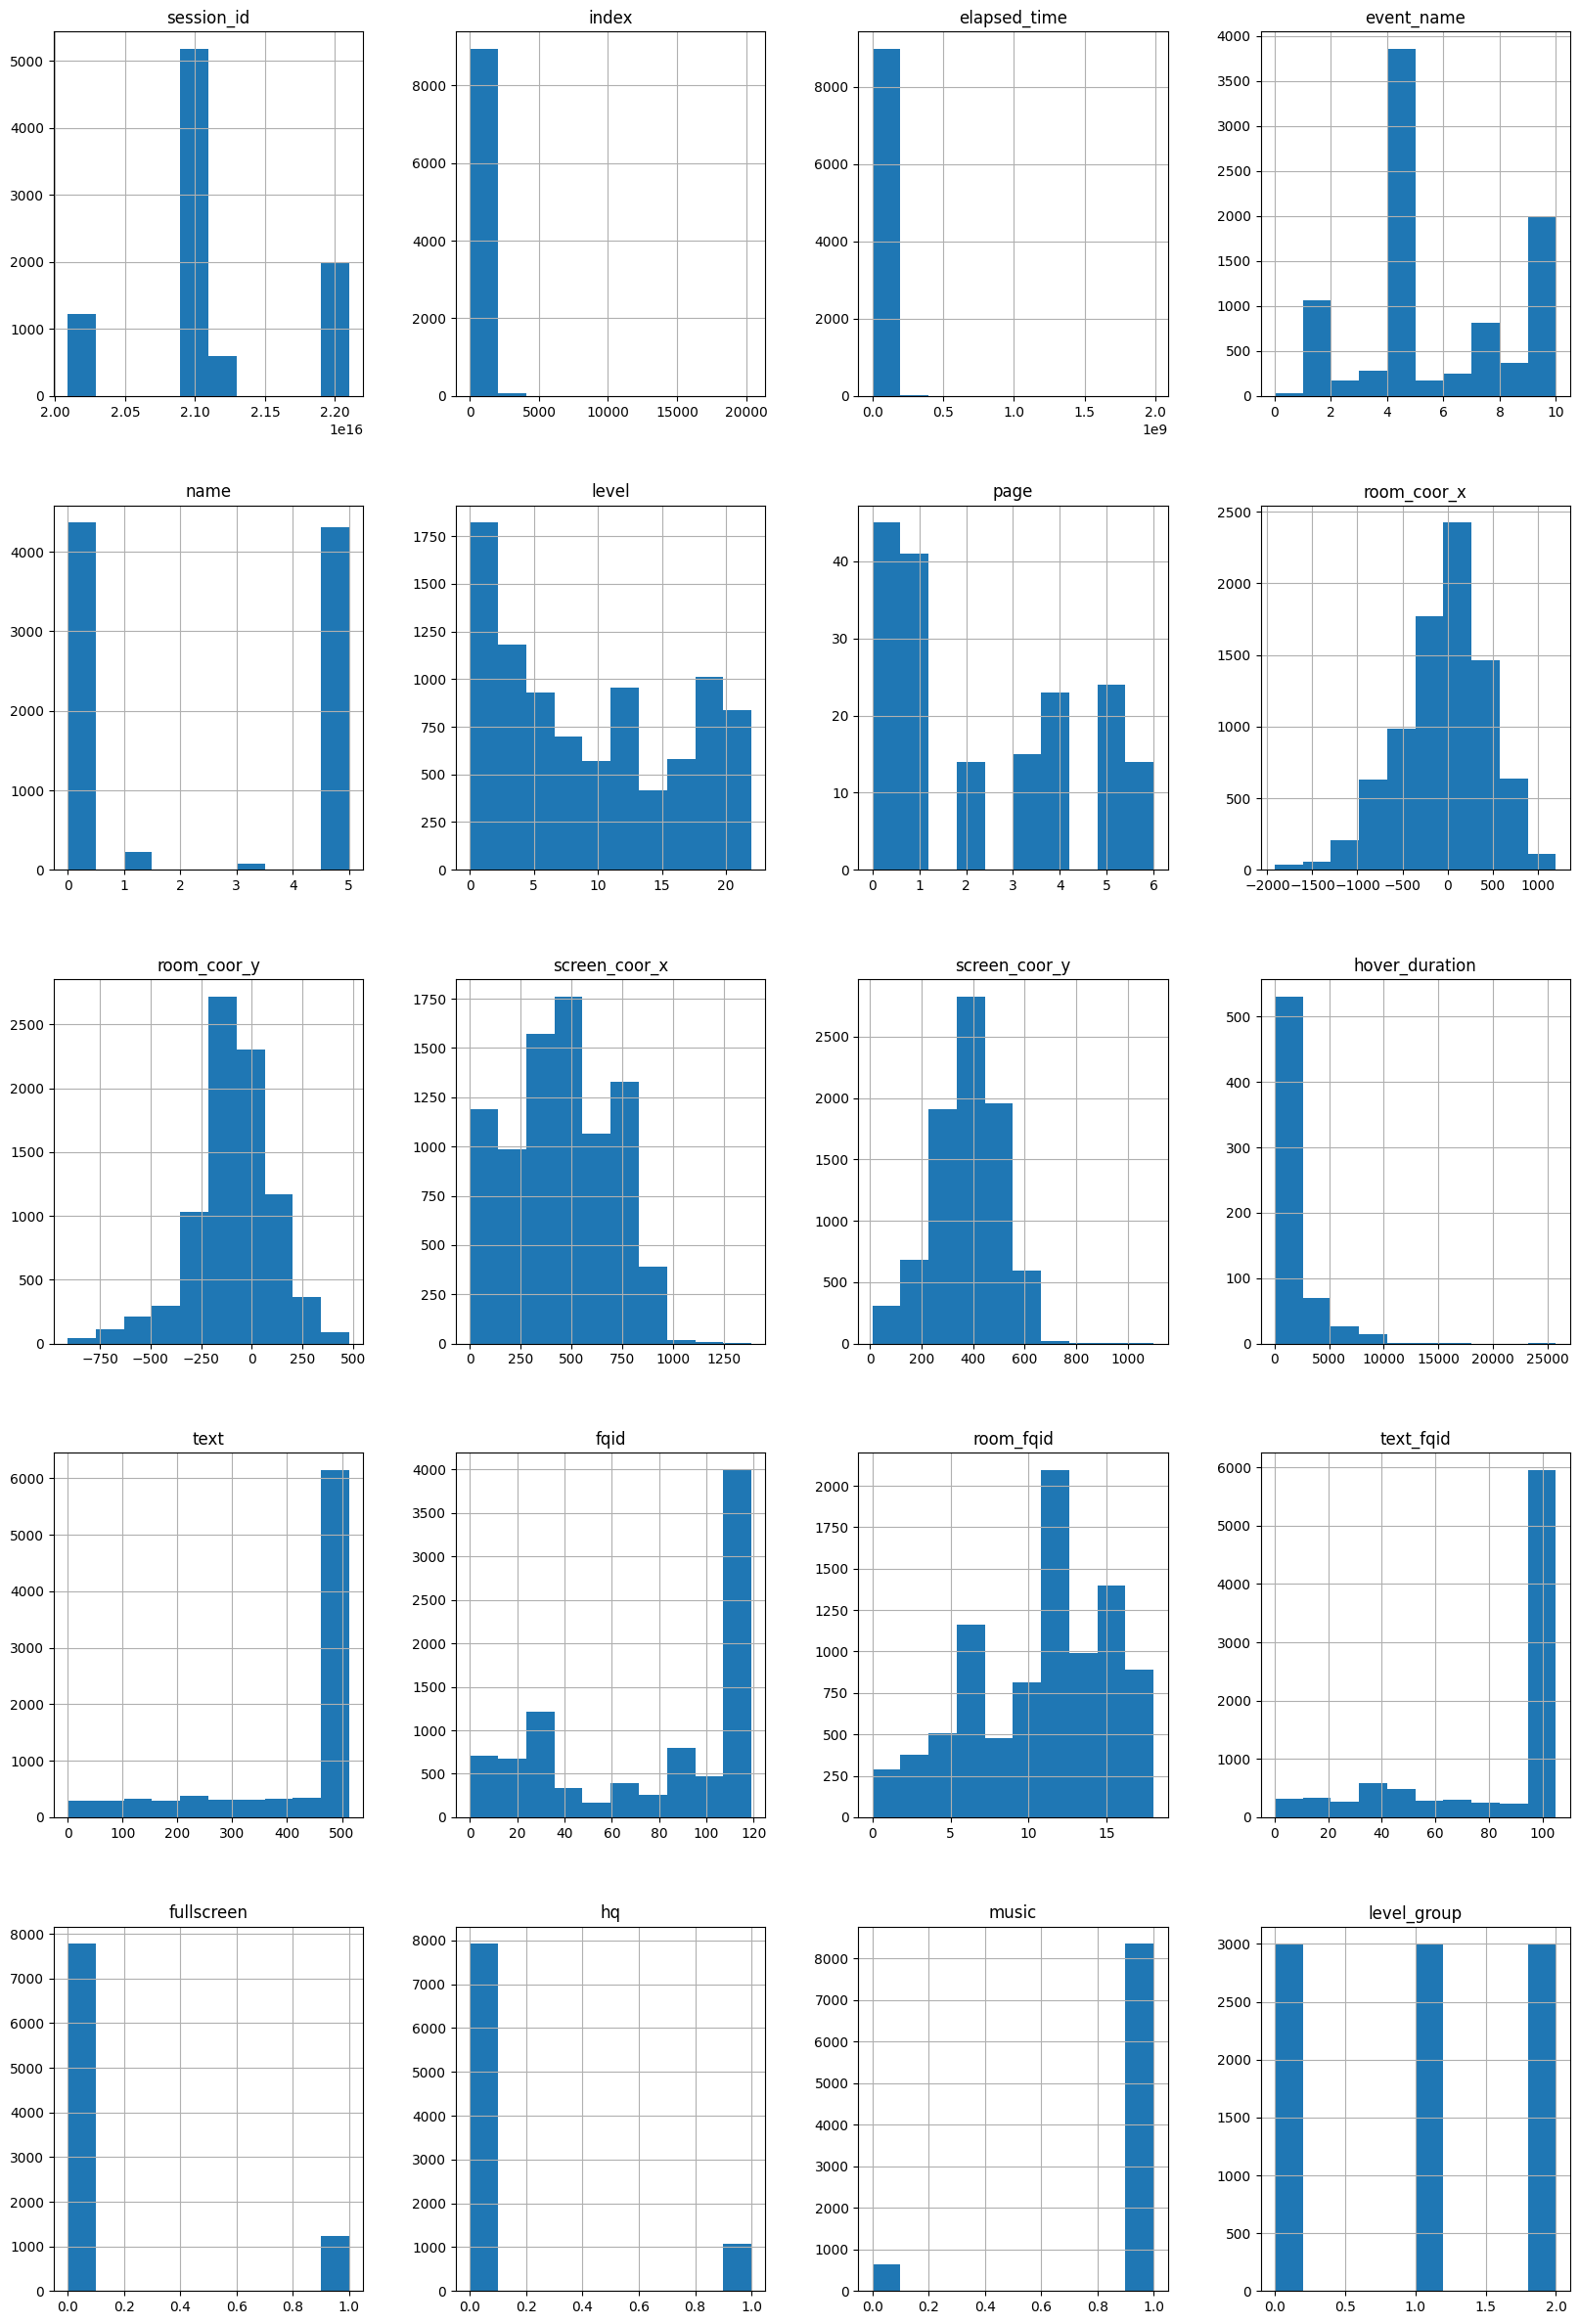

In [13]:
shown = strain[cols].hist(figsize=(20,30), layout=(5,4))

In [14]:
strain.isna().sum()

session_id           0
index                0
elapsed_time         0
event_name           0
name                 0
level                0
page              8824
room_coor_x        682
room_coor_y        682
screen_coor_x      682
screen_coor_y      682
hover_duration    8354
text                 0
fqid                 0
room_fqid            0
text_fqid            0
fullscreen           0
hq                   0
music                0
level_group          0
dtype: int64

In [15]:
#fill NaN values

In [16]:
strain = strain[strain['level'] <= 18]
strain.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
16693176,21070410353674470,13,17900,4,5,0,NaN,58.258077,-187.260764,221.0,471.0,NaN,513,119,7,105,0,0,0,0
22196170,22010617120962936,9,11316,1,0,0,NaN,82.229713,-136.698503,351.0,433.0,NaN,512,35,7,22,0,1,1,0
25361131,22080215512134348,1,4032,1,0,0,NaN,-236.991405,-76.314686,557.0,411.0,NaN,512,35,7,22,0,0,1,0
13008043,21040211015922452,66,148814,6,0,2,NaN,206.665275,96.076980,559.0,263.0,NaN,209,119,9,43,0,0,1,0
5961922,21010110175513948,84,159206,4,5,3,NaN,27.295272,178.868219,439.0,204.0,NaN,513,102,9,105,0,0,1,0


In [17]:
to_drop = ['page', 'hover_duration']
to_mean = ['fqid', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'text', 'text_fqid']

#hanlde na features(dropped)
for feature in to_drop:
    strain.drop(feature, axis=1, inplace=True)
    test.drop(feature, axis=1, inplace=True)

In [18]:
for feature in to_mean:
    t_mean = strain[feature].mean()
    st_mean = test[feature].mean()
    strain[feature] = strain[feature].fillna(t_mean)
    test[feature] = test[feature].fillna(st_mean)

In [19]:
#attach the targets to the right session_ids in the train set

In [20]:
merged = strain.merge(labels, on=['level','session_id'])

In [21]:
##try train test spilt feature here for accuracy test

In [22]:
# feature selection

In [23]:
from sklearn.feature_selection import VarianceThreshold

print('Variance Threshold')

selvt = VarianceThreshold(threshold=1)
selvt = selvt.fit_transform(merged)
selvt

Variance Threshold


array([[2.10402110e+16, 6.60000000e+01, 1.48814000e+05, ...,
        1.19000000e+02, 9.00000000e+00, 4.30000000e+01],
       [2.10101102e+16, 8.40000000e+01, 1.59206000e+05, ...,
        1.02000000e+02, 9.00000000e+00, 1.05000000e+02],
       [2.10002071e+16, 6.30000000e+01, 6.89420000e+04, ...,
        1.19000000e+02, 7.00000000e+00, 1.05000000e+02],
       ...,
       [2.10401091e+16, 6.75000000e+02, 1.33391700e+06, ...,
        1.19000000e+02, 1.00000000e+01, 1.05000000e+02],
       [2.01103144e+16, 9.46000000e+02, 1.94380600e+06, ...,
        1.19000000e+02, 6.00000000e+00, 1.05000000e+02],
       [2.20501155e+16, 6.01000000e+02, 1.15729900e+06, ...,
        2.00000000e+01, 6.00000000e+00, 1.40000000e+01]])

In [24]:
#accuracy scores from ben

In [25]:
y = merged['correct']
tr = merged.drop(['correct'],axis=1)
session_level = test['session_level']
test = test.drop(['session_level'],axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

HGBClf = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
HGBClf.fit(tr, y)
HGB_preds = HGBClf.predict(test)

#gives accuracy 0.6626506024096386 without tuning
SGDClf = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(tr, y)
SGD_preds = SGDClf.predict(test)

#gives accuracy 0.5542168674698795 without tuning
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(tr, y)
dtree_preds = dtree.predict(test)

#get accuracy
correct = 0
count = 0
for i in SGD_preds:
    if i == y[count]:
        correct += 1
    count += 1
    
#show metrics
print("\naccuracy: ")
print(correct / len(SGD_preds))
print("\npredicted")
print(SGD_preds)


accuracy: 
0.7964055793991416

predicted
[1 1 1 ... 1 1 1]
